In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import os
from numpy import linalg
import math
import itertools

In [2]:
# Function to convert the Rotation Matrix into the Euler Angles
def eulerAnglesToRotationMatrix(theta) :
    R_x = np.array([[1,0,0],[0,math.cos(theta[0]),-math.sin(theta[0])],[0,math.sin(theta[0]), math.cos(theta[0])]])
    R_y = np.array([[math.cos(theta[1]),0,math.sin(theta[1])],[0,1,0],[-math.sin(theta[1]),0,math.cos(theta[1])]])             
    R_z = np.array([[math.cos(theta[2]),-math.sin(theta[2]),0],[math.sin(theta[2]),math.cos(theta[2]),0],[0,0,1]])
    R = np.dot(R_z,np.dot(R_y,R_x))
    return R

In [4]:
I1 = cv2.imread('Camera_calibration_data/IMG_5456.JPG')
ret, corners = cv2.findChessboardCorners(I1,(8,6))
corners = corners.reshape(-1,2)
print (corners.shape)
print (corners)

(48, 2)
[[1070.5607   582.6061 ]
 [1513.       584.5    ]
 [1953.3451   586.5297 ]
 [2396.1528   587.337  ]
 [2831.205    585.28864]
 [3272.9387   585.72156]
 [3710.4912   584.41547]
 [4149.5044   579.3382 ]
 [1074.5     1027.     ]
 [1518.3907  1026.6111 ]
 [1959.2633  1028.5801 ]
 [2398.6655  1027.4331 ]
 [2835.5378  1028.6383 ]
 [3273.7004  1026.2534 ]
 [3712.8418  1026.7549 ]
 [4150.2944  1023.9695 ]
 [1078.08    1469.958  ]
 [1519.5     1470.     ]
 [1959.4504  1470.6831 ]
 [2398.0178  1468.3427 ]
 [2834.9082  1469.3081 ]
 [3273.1924  1467.2858 ]
 [3711.6316  1468.2706 ]
 [4153.3022  1466.6912 ]
 [1081.      1909.5    ]
 [1521.9062  1908.5188 ]
 [1963.7126  1908.3644 ]
 [2400.8838  1907.8263 ]
 [2838.933   1908.5192 ]
 [3276.7446  1905.0239 ]
 [3716.0671  1905.8381 ]
 [4153.4956  1904.5812 ]
 [1082.2538  2352.2356 ]
 [1524.      2350.     ]
 [1963.8134  2347.9915 ]
 [2402.3164  2347.0679 ]
 [2840.916   2345.8162 ]
 [3279.2966  2346.664  ]
 [3717.0776  2344.0317 ]
 [4157.0513  2346

In [5]:
x,y=np.meshgrid(range(8),range(6))
world_points=np.hstack((x.reshape(48,1),y.reshape(48,1),np.zeros((48,1)))).astype(np.float32)
print(world_points)
## Correspondences
print (corners[0],'->',world_points[0])
print (corners[35],'->',world_points[35])

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]]
[1070.5607  582.6061] -> [0. 0. 0.]
[2402.3164 2347.0679] -> [3. 4. 0.]


In [6]:
_3d_points=[]
_2d_points=[]

for i in range(5456,5471):
    im=cv2.imread('Camera_calibration_data/IMG_' + str(i) + '.JPG')
    
    ret, corners = cv2.findChessboardCorners(im, (8,6))
    
    if ret: #add points only if checkerboard was correctly detected:
        _2d_points.append(corners) #append current 2D points
        _3d_points.append(world_points) #3D points are always the same

# print(_3d_points)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(_3d_points, _2d_points, (im.shape[1],im.shape[0]), None, None)

print('Reprojection Error:', ret)
print ('Camera Calibration Matrix:')
print(mtx)
print('Distortion Parameters:')
print(dist)
print('Rotation Vectors for the images are:')
print(rvecs)
print('Translation Vectors for the images are:')
print(tvecs)

Reprojection Error: 2.48108498382283
Camera Calibration Matrix:
[[1.36634771e+04 0.00000000e+00 3.33653576e+03]
 [0.00000000e+00 1.36813826e+04 1.49660066e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Parameters:
[[ 9.52129447e-02  1.01092784e+01 -1.52798046e-02  2.87213059e-02
  -1.60590017e+02]]
Rotation Vectors for the images are:
[array([[-0.01318089],
       [-0.05189252],
       [-0.00310183]]), array([[-0.00723373],
       [ 0.22652171],
       [ 0.03532858]]), array([[-0.00906864],
       [-0.41619657],
       [-0.03572075]]), array([[ 0.01633958],
       [-0.61839253],
       [-0.07755517]]), array([[0.00456622],
       [0.30778504],
       [0.06543949]]), array([[-0.32566618],
       [-0.22232068],
       [-0.01742856]]), array([[-0.19221716],
       [-0.38502421],
       [-0.00381478]]), array([[ 0.24427917],
       [-0.32262058],
       [ 0.02472158]]), array([[0.31114495],
       [0.06632946],
       [0.07053941]]), array([[ 0.34957369],
       [-0.56388

(48, 3)


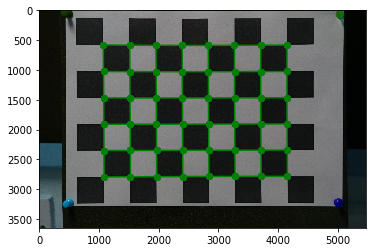

In [7]:
im = cv2.imread('Camera_calibration_data/IMG_5456.JPG')  
p = cv2.projectPoints(_3d_points[0],rvecs[0],tvecs[0],mtx,dist)[0]
print(_3d_points[0].shape)
points = p[:,0]
plt.imshow(im)

plt.scatter(points[:,0],points[:,1])
# print(points.shape)

idx = [7,15,23,31,39,47]
idx1 = [5,11,17,23,29,35,41,47]

q = 0
p = 0
for i in range(points.shape[0]):
    if (i == idx[q]):
        q = q + 1
        continue
    plt.plot([points[i][0],points[i+1][0]],[points[i][1],points[i+1][1]],'go-')
for i in range(8):
    i1 = i
    j =  i + 8
    while(j < 48):
        plt.plot([points[i1][0],points[j][0]],[points[i1][1],points[j][1]],'go-')
        i1 = j
        j = j + 8
        
        

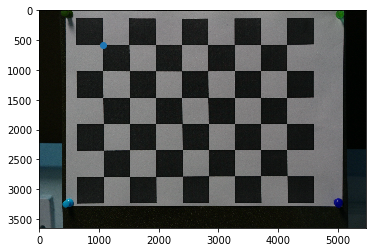

In [8]:
world_origin = np.matrix([0,0,0]).astype(np.float32)
world_origin.reshape(1,3)

origin_p = cv2.projectPoints(world_origin,rvecs[0],tvecs[0],mtx,dist)[0]

points = origin_p[:,0]
plt.imshow(im)

plt.scatter(points[:,0],points[:,1])